In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from scikeras.wrappers import KerasClassifier


In [2]:
#Digit MNIST dataset
(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()

In [3]:
X_train_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

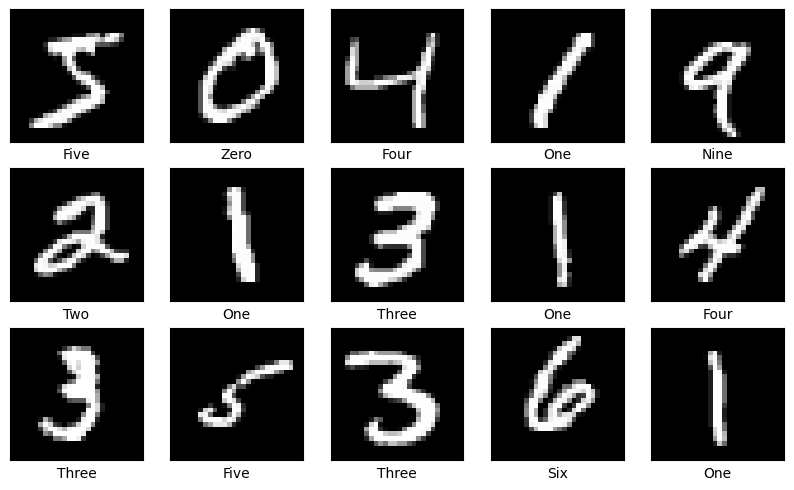

In [5]:
#names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#visualising the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

In [6]:
X_train_digit.shape

(60000, 28, 28)

In [7]:
X_train_digit = X_train_digit.reshape(60000,784)
X_test_digit = X_test_digit.reshape(10000,784)

In [8]:
X_train_digit.shape #60000-row,784-columns

(60000, 784)

In [9]:
y_test_digit

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
y_test_digit.shape #1D  0-9  ,10 classes classify like dog and cat-2 classes

(10000,)

In [11]:
#one hot encoding digi MNIST labels, 1Dconverted to 2D using one hot encoding,input -2D ,output- one hot encoding and submit use for ANN model -preprocessing technique
#for free calculation and accuracy

y_train_digit = to_categorical(y_train_digit, num_classes=10)
y_test_digit = to_categorical(y_test_digit, num_classes=10)

In [12]:
y_train_digit[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
#procedure creating base neural network ,sequential -Neuron output to input process dense-input to hidden gap 256 neuron playable parameter each neuron has information
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),   #256neuron-784 hidden layer,relu -maths of 0,input value whichever high it takes
    #layers.Dropout(0.3),
    #layers.BatchNormallization(),
    layers.Dense(64, activation='relu'), #2nd hidden layer 784-256-64-64 ->10 -feed forward
    layers.Dense(64, activation='relu'),
    #relu donot want input, input=befor output
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),  #output 10 class   sigmoid S 0-1 whichever high logistic 
])
    

model.summary()

In [15]:
# param_number = output_channel_number * (input_channel_number + 1) model.summary() 256*(784+1) ,64*(256+1),

In [16]:
#compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])
              


In [17]:
history=model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=10,validation_data=(X_test_digit, y_test_digit))

Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 1.1593 - accuracy: 0.8543 - val_loss: 0.3380 - val_accuracy: 0.9158
Epoch 2/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2300 - accuracy: 0.9390 - val_loss: 0.2313 - val_accuracy: 0.9421
Epoch 3/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1589 - accuracy: 0.9543 - val_loss: 0.1942 - val_accuracy: 0.9519
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1175 - accuracy: 0.9655 - val_loss: 0.1626 - val_accuracy: 0.9561
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1083 - accuracy: 0.9678 - val_loss: 0.1651 - val_accuracy: 0.9585
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0880 - accuracy: 0.9736 - val_loss: 0.1413 - val_accuracy: 0.9651
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0841 - accuracy: 0.9750 - val_loss: 0.1644 - val_accuracy: 0.9589
Epoch 

In [18]:
#predicting the labels_Digit
y_predict = model.predict(X_test_digit)

313/313 [==============================] - 1s 1ms/step


In [19]:
y_predict[0]

array([0.99972314, 0.9999842 , 1.        , 1.        , 0.999661  ,
       0.9998653 , 0.01048081, 1.        , 0.9999995 , 0.9999998 ],
      dtype=float32)

In [20]:
y_predicts=np.argmax(y_predict, axis=1) #here we get the index of maxmimum value in the encoded vector

In [21]:
y_predicts   #predicted test data

array([2, 0, 1, ..., 4, 5, 6], dtype=int64)

In [22]:
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

In [23]:
y_test_digit_eval #actual test data

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

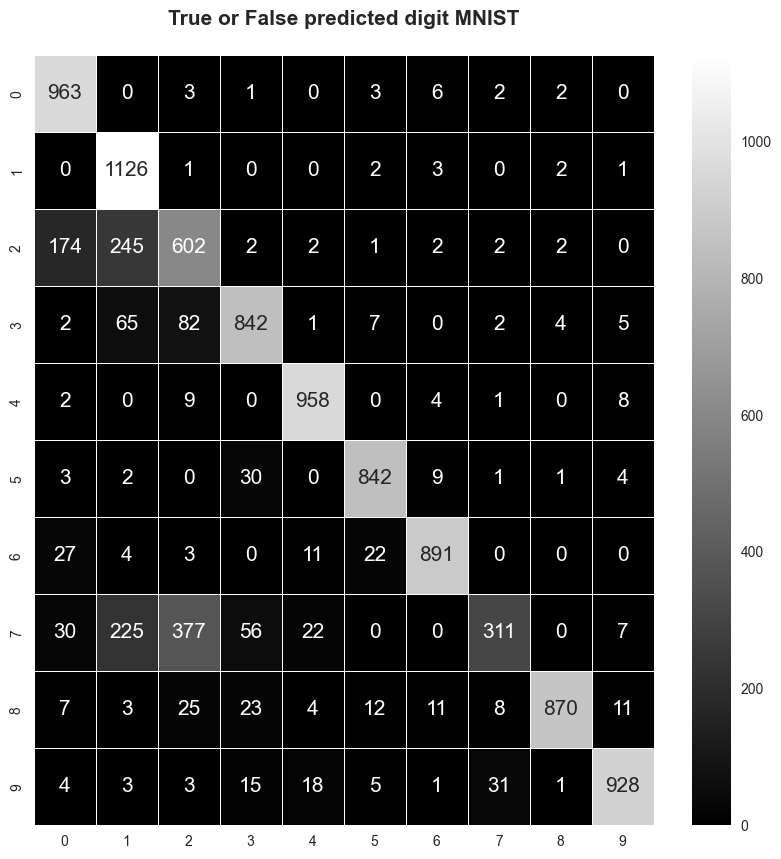

In [25]:
#confusion matrix for Digit MNIST
plt.style.use('seaborn-v0_8')
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)

plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5, fmt="d", cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold', fontsize=15)
plt.show()

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88       980
           1       0.67      0.99      0.80      1135
           2       0.54      0.58      0.56      1032
           3       0.87      0.83      0.85      1010
           4       0.94      0.98      0.96       982
           5       0.94      0.94      0.94       892
           6       0.96      0.93      0.95       958
           7       0.87      0.30      0.45      1028
           8       0.99      0.89      0.94       974
           9       0.96      0.92      0.94      1009

    accuracy                           0.83     10000
   macro avg       0.85      0.84      0.83     10000
weighted avg       0.85      0.83      0.82     10000



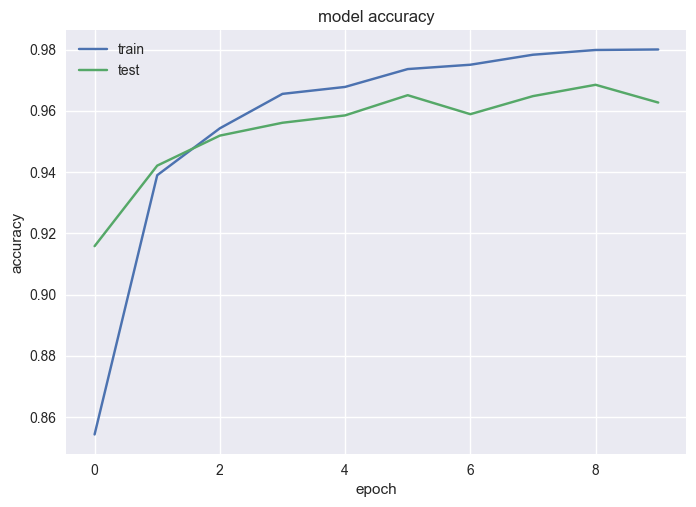

In [27]:
#summarise history for accuracy accuracy graph  decrese to increase
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


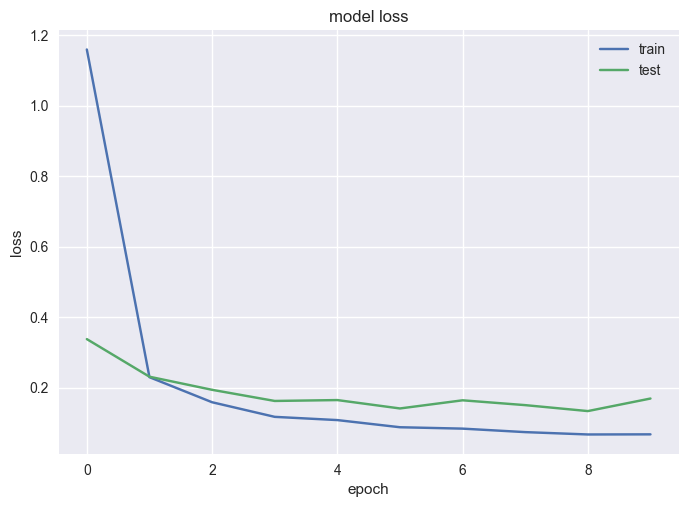

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [30]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(X_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single, axis=1)  #here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

1/1 [==============================] - 0s 95ms/step


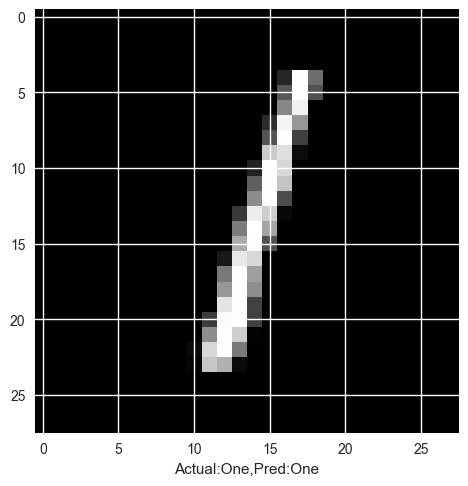

In [31]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']
#visualising the digits
#plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[2].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()